<a href="https://colab.research.google.com/github/aysutnyva/Machine_Learning/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!/bin/bash
!kaggle datasets download mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 11.5MB/s]


In [ ]:
!unzip /content/insurance.zip

Archive:  /content/insurance.zip
  inflating: insurance.csv           


In [ ]:
insurance = pd.read_csv(r'/content/insurance.zip')

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


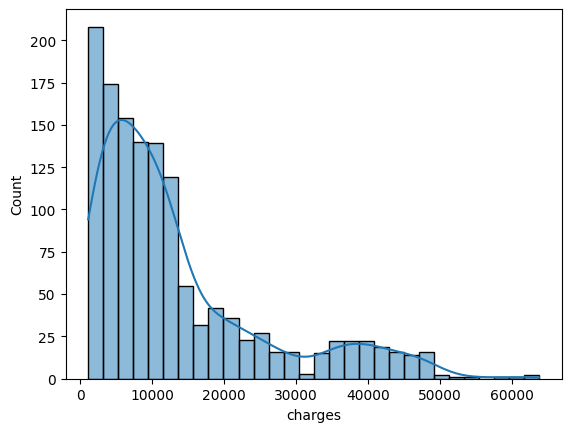

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(insurance['charges'], bins=30, kde=True)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoder = LabelEncoder()
insurance['sex'] = encoder.fit_transform(insurance['sex'])  # Male=1, Female=0
insurance['smoker'] = encoder.fit_transform(insurance['smoker'])  # Yes=1, No=0
insurance['region'] = encoder.fit_transform(insurance['region'])  # Convert regions to numbers



In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = insurance.drop(columns=['charges'])  # Features
y = insurance['charges']  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
model.score(X_train, y_train)


0.9743093242531877

In [ ]:
model.score(X_test, y_test)

0.8642606273649586

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([11129.2098068 ,  5279.3315315 , 28261.1135955 , 10712.5176533 ,
       34526.7010364 ,  9133.2200995 ,  2099.488392  , 14442.4762686 ,
        6038.4547952 , 10666.8380547 , 20235.6347478 ,  7384.2326753 ,
        4894.364618  , 46496.3565675 , 48415.4409348 , 45504.3021979 ,
        9925.6052816 , 43438.6655569 ,  9047.2776489 , 24237.7887065 ,
        6187.8446445 , 10763.3418747 ,  2281.7628236 ,  2711.6813281 ,
       12010.4130091 , 12186.2529167 , 13297.2574337 ,  6933.1372034 ,
       10370.8181676 ,  5050.91832532,  7689.3889535 , 11742.2911635 ,
        2513.7029761 ,  5445.6901702 ,  3189.7811542 , 10587.6009703 ,
        2671.0216105 ,  8191.9397535 , 23487.365382  , 39321.461817  ,
        6489.3096034 ,  2746.9478863 , 11998.2359501 , 14479.734655  ,
        5821.3102169 , 15350.0639343 , 15116.0722669 ,  5903.1316494 ,
       42330.6993162 ,  7200.0425201 , 13889.2426335 ,  2171.0700651 ,
        6805.0877189 ,  1831.43492725, 12272.9471291 , 11834.6874174 ,
      

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = insurance.drop(columns=['charges'])  # Features
y = insurance['charges']  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert training and test sets into DataFrames
train_ins = pd.DataFrame(X_train, columns=X.columns)
train_ins['charges'] = y_train.values

test_ins = pd.DataFrame(X_test, columns=X.columns)
test_ins['charges'] = y_test.values

# Display train and test datasets
print("Training Data (First 5 Rows):")
print(train_ins.head())

print("Testing Data (First 5 Rows):")
print(test_ins.head())


Training Data (First 5 Rows):
      age  sex    bmi  children  smoker  region      charges
560    46    0  19.95         2       0       1   9193.83850
1285   47    0  24.32         0       0       0   8534.67180
1142   52    0  24.86         0       0       2  27117.99378
969    39    0  34.32         5       0       2   8596.82780
486    54    0  21.47         3       0       1  12475.35130
Testing Data (First 5 Rows):
      age  sex     bmi  children  smoker  region      charges
764    45    0  25.175         2       0       0   9095.06825
887    36    0  30.020         0       0       1   5272.17580
890    64    0  26.885         0       1       1  29330.98315
1293   46    1  25.745         3       0       1   9301.89355
259    19    1  31.920         0       1       1  33750.29180


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Create a DataFrame with predictions
predicted_ins = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges': y_pred
})

# Add error column (difference between actual & predicted)
predicted_ins['Error'] = predicted_ins['Actual Charges'] - predicted_ins['Predicted Charges']

# Display the results
print("Predicted vs. Actual Charges:")
print(predicted_ins.head())


Predicted vs. Actual Charges:
   Actual Charges  Predicted Charges        Error
0      9095.06825       11129.209807 -2034.141557
1      5272.17580        5279.331531    -7.155732
2     29330.98315       28261.113596  1069.869554
3      9301.89355       10712.517653 -1410.624103
4     33750.29180       34526.701036  -776.409236


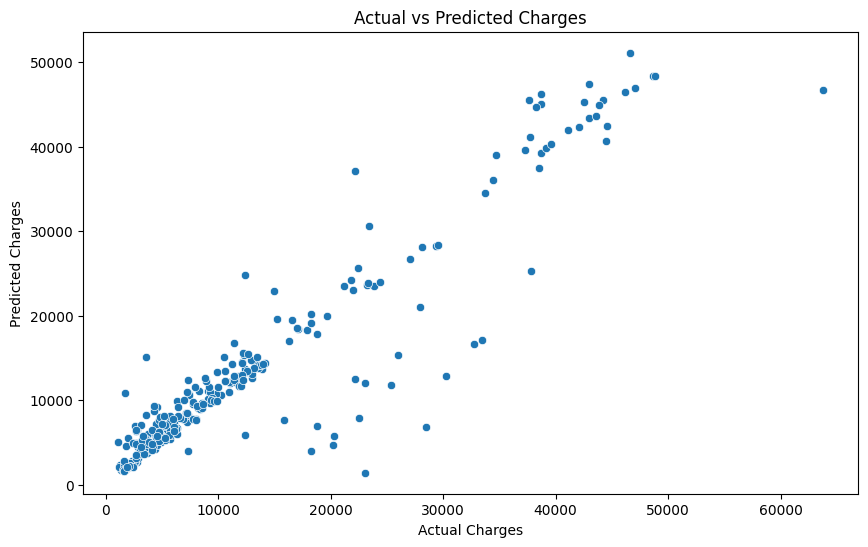

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_ins['Actual Charges'], y=predicted_ins['Predicted Charges'])
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


df = pd.read_csv("insurance.csv")


X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target variable

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer([
    ('num_scaling', StandardScaler(), numerical_cols),  # Scale numerical data
    ('cat_encoding', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical data
])


model_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Data processing
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Model
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

predicted_df = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges': y_pred
})

print(predicted_df.head())


   Actual Charges  Predicted Charges
0      9095.06825        9630.262601
1      5272.17580        5570.196677
2     29330.98315       28239.647086
3      9301.89355       12462.682487
4     33750.29180       34640.860712
